# Preprocessing

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import torch
import pickle

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [12]:
data = pd.read_csv('./kl_data4.csv')
data

,day,time,temperature,humidity,gas,motion,dampness,trash,rating
0,2023-11-01,0:00,25.877322,76.955939,775.0,0,4095.000000,15.0,5
1,2023-11-01,0:05,25.139135,76.425273,725.0,0,4095.000000,15.0,5
2,2023-11-01,0:10,26.843238,77.102513,769.0,0,4095.000000,15.0,5
3,2023-11-01,0:15,25.344632,76.212004,724.0,0,4095.000000,15.0,5
4,2023-11-01,0:20,26.764051,76.274117,745.0,0,4095.000000,15.0,4
...,...,...,...,...,...,...,...,...,...
12091,2023-12-12,23:35,26.284555,78.988115,1275.0,0,2567.093076,3.0,4
12092,2023-12-12,23:40,26.898266,78.694230,1220.0,0,2513.040943,3.0,4
12093,2023-12-12,23:45,26.981900,78.042265,1220.0,0,2505.040738,3.0,4
12094,2023-12-12,23:50,25.228414,78.670817,1123.0,0,2560.914603,3.0,4


In [13]:
data_X = data[["temperature", "humidity", "gas", "motion", "dampness", "trash"]]
data_Y = data["rating"]

# Load standard scaler 
with open('lstm_sc.pkl','rb') as f:
    sc = pickle.load(f)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.2)
sc.fit(data_X)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [14]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Define class labels 
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Gaussian NB

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.2)
clf = GaussianNB()
clf.fit(X_train, Y_train)

pred_train = clf.predict(X_train)
perf_train = np.mean(pred_train == Y_train)
print("The Naive Bayes classifer correctly classified %3.4f%% of the training data." % (perf_train * 100.0))

pred_test = clf.predict(X_test)
perf_test = np.mean(pred_test == Y_test)
print("The Naive Bayes classifer correctly classified %3.4f%% of the test data." % (perf_test * 100.0))

The Naive Bayes classifer correctly classified 71.9512% of the training data.
The Naive Bayes classifer correctly classified 71.4463% of the test data.


Training Confusion Matrix


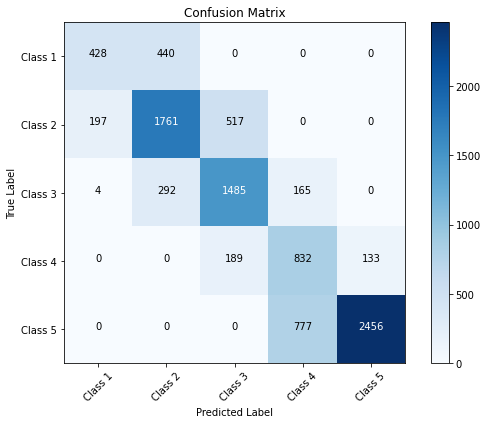

Testing Confusion Matrix


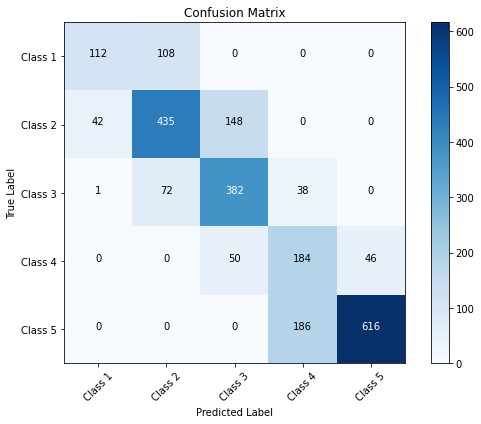

In [16]:
print("Training Confusion Matrix")
cm = confusion_matrix(pred_train, Y_train.values)
plot_confusion_matrix(cm, classes)

print("Testing Confusion Matrix")
cm = confusion_matrix(pred_test, Y_test.values)
plot_confusion_matrix(cm, classes)

# Linear SVC

In [8]:
svc_linear = LinearSVC(max_iter = 100000, loss = 'hinge', penalty = 'l2')
svc_linear.fit(X_train, Y_train)

pred_train = svc_linear.predict(X_train)
perf_train = np.mean(pred_train == Y_train)
print("The LinearSVC correctly classified %3.4f%% of the training data" % (perf_train * 100.0))

pred_test = svc_linear.predict(X_test)
perf_test = np.mean(pred_test == Y_test)
print("The LinearSVC correctly classified %3.4f%% of the testing data" % (perf_test * 100.0))

The LinearSVC correctly classified 61.3270% of the training data
The LinearSVC correctly classified 62.2314% of the testing data


Training Confusion Matrix


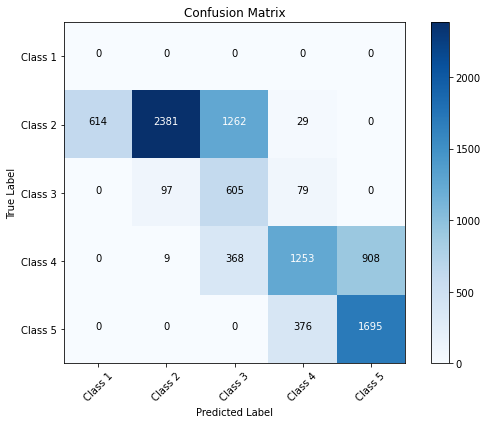

Testing Confusion Matrix


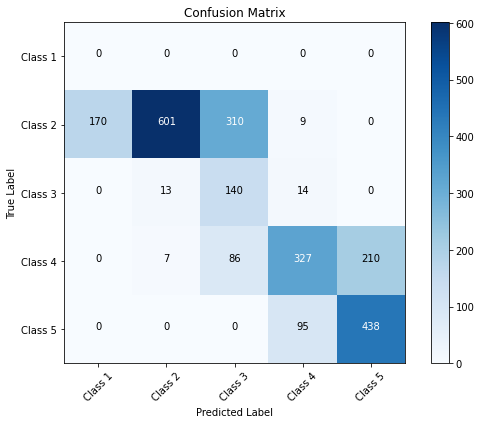

In [9]:
print("Training Confusion Matrix")
cm = confusion_matrix(pred_train, Y_train.values)
plot_confusion_matrix(cm, classes)

print("Testing Confusion Matrix")
cm = confusion_matrix(pred_test, Y_test.values)
plot_confusion_matrix(cm, classes)

# SVC with Grid Search

In [18]:
C_params = {'C':[1, 10]}
kernel_params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
decision_function_shape_params = {'decision_function_shape':('ovr', 'ovo')}

grid_svc = GridSearchCV(SVC(max_iter = 10000), [C_params, kernel_params, decision_function_shape_params])
grid_svc.fit(X_train, Y_train)

pred_train = grid_svc.predict(X_train)
perf_train = np.mean(pred_train == Y_train)
print("The GridSearchCV(SVC) correctly classified %3.4f%% of the training data" % (perf_train * 100.0))

pred_test = grid_svc.predict(X_test)
perf_test = np.mean(pred_test == Y_test)
print("The GridSearchCV(SVC) correctly classified %3.4f%% of the testing data" % (perf_test * 100.0))

The GridSearchCV(SVC) correctly classified 69.3468% of the training data
The GridSearchCV(SVC) correctly classified 69.1322% of the testing data


Training Confusion Matrix


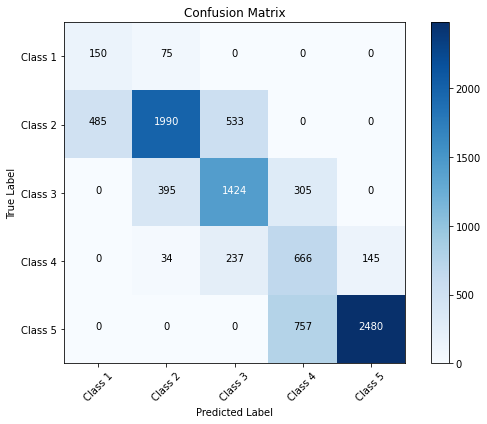

Testing Confusion Matrix


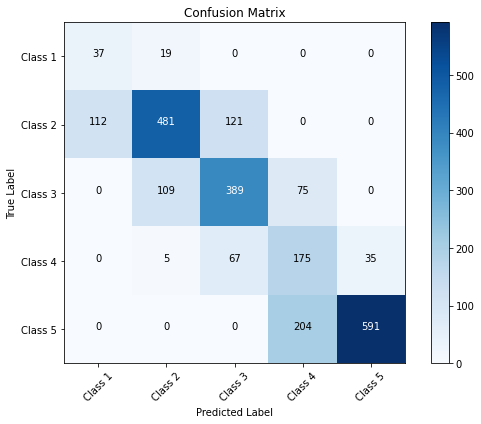

In [19]:
print("Training Confusion Matrix")
cm = confusion_matrix(pred_train, Y_train.values)
plot_confusion_matrix(cm, classes)

print("Testing Confusion Matrix")
cm = confusion_matrix(pred_test, Y_test.values)
plot_confusion_matrix(cm, classes)

# Random Forest Classifier 

In [20]:
rforest =  RandomForestClassifier(random_state = 0)
rforest.fit(X_train, Y_train)
                         
pred_train = rforest.predict(X_train)
perf_train = np.mean(pred_train == Y_train)
print("The Random Forest Classifier correctly classified %3.4f%% of the training data irises" % (perf_train * 100.0))

pred_test = rforest.predict(X_test)
perf_test = np.mean(pred_test == Y_test)
print("The Random Forest Classifier correctly classified %3.4f%% of the testing data irises" % (perf_test * 100.0))

The Random Forest Classifier correctly classified 100.0000% of the training data irises
The Random Forest Classifier correctly classified 70.8678% of the testing data irises


Training Confusion Matrix


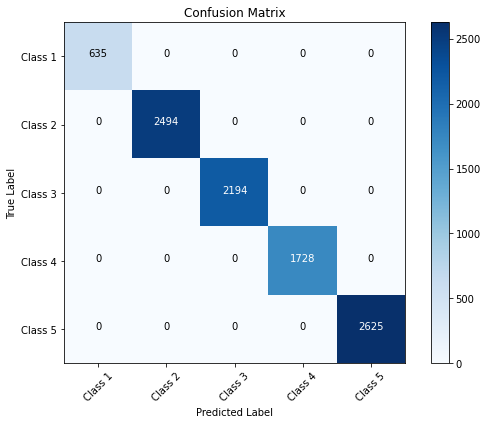

Testing Confusion Matrix


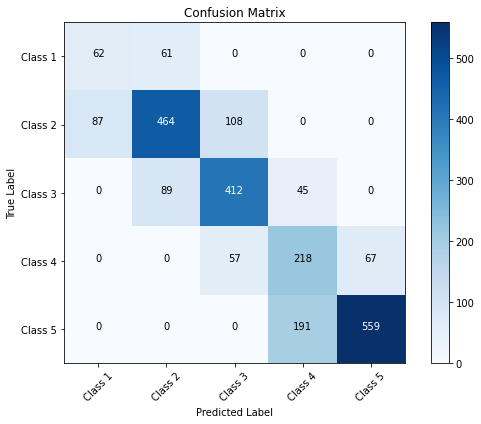

In [21]:
print("Training Confusion Matrix")
cm = confusion_matrix(pred_train, Y_train.values)
plot_confusion_matrix(cm, classes)

print("Testing Confusion Matrix")
cm = confusion_matrix(pred_test, Y_test.values)
plot_confusion_matrix(cm, classes)

# Neural Network 

In [57]:
# import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = pd.read_csv('./kl_data4.csv')
data_X = data[["temperature", "humidity", "gas", "motion", "dampness", "trash"]]
data_Y = data["class"]

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
class ModelNN(nn.Module):
    def __init__(self):
        super(ModelNN, self).__init__()
        self.l1 = nn.Linear(6, 128)
        self.dropout = nn.Dropout(0.1)
        self.l2 = nn.Linear(128, 64)
        self.l3 = nn.Linear(64, 5) # 5 classes: from 1-5

    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.dropout(x)
        output = self.l3(x)
        return output

In [70]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [60]:
batch_size = 10
Y_train = Y_train.values - 1 # classifier values [0, 1, 2, 3, 4]
Y_test = Y_test.values - 1 # classifier values [0, 1, 2, 3, 4]

from torch.utils.data import TensorDataset, DataLoader

training_set = TensorDataset(torch.Tensor(X_train).to(device), torch.tensor(Y_train).to(device))
test_set = TensorDataset(torch.Tensor(X_test).to(device), torch.tensor(Y_test).to(device))
train_loader = DataLoader(training_set, batch_size = batch_size)
test_loader = DataLoader(test_set, batch_size = batch_size)

In [61]:
model = ModelNN()

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# data.to(device)
train_labels = []
train_predicted = []
test_labels = []
test_predicted = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 500
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch%10 == 0): 
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for rows, labels in train_loader:
        outputs = model(rows)
        _, predicted = torch.max(outputs.data, 1)
        train_labels.extend((list(np.array(labels))))
        train_predicted.extend((list(np.array(predicted))))
    
    correct = 0
    total = 0
    for rows, labels in test_loader:
        outputs = model(rows)
        _, predicted = torch.max(outputs.data, 1)
        test_labels.extend((list(np.array(labels))))
        test_predicted.extend((list(np.array(predicted))))

Epoch [1/500], Loss: 1.2758
Epoch [11/500], Loss: 0.9311
Epoch [21/500], Loss: 0.8965
Epoch [31/500], Loss: 1.0508
Epoch [41/500], Loss: 1.0362
Epoch [51/500], Loss: 1.0996
Epoch [61/500], Loss: 1.0734
Epoch [71/500], Loss: 1.0317
Epoch [81/500], Loss: 0.9095
Epoch [91/500], Loss: 0.9704
Epoch [101/500], Loss: 0.8739
Epoch [111/500], Loss: 0.8104
Epoch [121/500], Loss: 0.7924
Epoch [131/500], Loss: 0.7727
Epoch [141/500], Loss: 0.7876
Epoch [151/500], Loss: 1.1294
Epoch [161/500], Loss: 0.9303
Epoch [171/500], Loss: 0.8598
Epoch [181/500], Loss: 0.7552
Epoch [191/500], Loss: 0.6101
Epoch [201/500], Loss: 0.5580
Epoch [211/500], Loss: 0.6673
Epoch [221/500], Loss: 0.6895
Epoch [231/500], Loss: 0.7005
Epoch [241/500], Loss: 0.7327
Epoch [251/500], Loss: 0.5787
Epoch [261/500], Loss: 0.6451
Epoch [271/500], Loss: 0.5090
Epoch [281/500], Loss: 0.5074
Epoch [291/500], Loss: 0.7697
Epoch [301/500], Loss: 1.6986
Epoch [311/500], Loss: 0.8222
Epoch [321/500], Loss: 0.5344
Epoch [331/500], Loss

In [67]:
perf_train = accuracy_score(train_predicted, train_labels)
print("The Neural Network correctly classified %3.4f%% of the training data irises" % (perf_train * 100.0))

perf_test = accuracy_score(test_predicted, test_labels)
print("The Neural Network correctly classified %3.4f%% of the training data irises" % (perf_test * 100.0))

The Neural Network correctly classified 77.4184% of the training data irises
The Neural Network correctly classified 71.6942% of the training data irises


Training Confusion Matrix


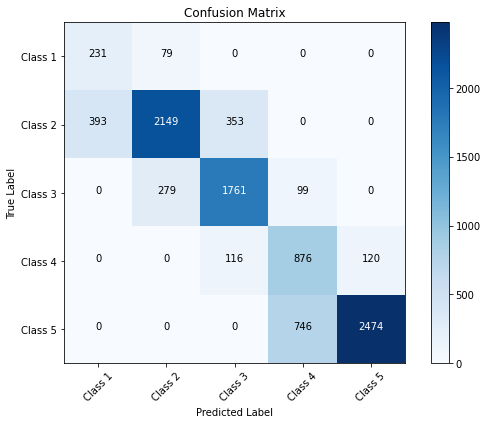

Testing Confusion Matrix


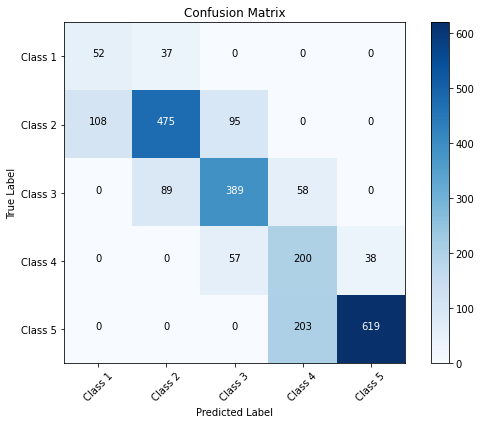

In [63]:
print("Training Confusion Matrix")
cm = confusion_matrix(train_predicted, train_labels)
plot_confusion_matrix(cm, classes)

print("Testing Confusion Matrix")
cm = confusion_matrix(test_predicted, test_labels)
plot_confusion_matrix(cm, classes)

In [68]:
# Save Neural Network 
model_path = 'classify_nn.pth'

# Save the entire model
torch.save(model, model_path)